2500 2500 2500 2500


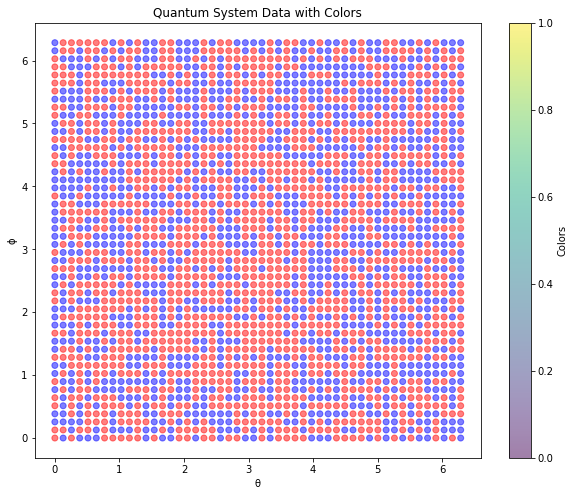

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import json

# Load the data from the JSON file
with open('data.json', 'r') as f:
    data = json.load(f)

# Extract the data including colors
theta_values = data['theta_values']
phi_values = data['phi_values']
results = data['results']

# Generate colors for each data point
# Ensure that 'colors' has the same length as 'theta_values' and 'phi_values'
colors = data['colors']

print (len(theta_values), len(phi_values), len(results), len(colors))
# Create a scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(theta_values, phi_values, c=colors, alpha=0.5)
plt.xlabel('θ')
plt.ylabel('ϕ')
plt.title('Quantum System Data with Colors')
plt.colorbar(label='Colors')  # Add a colorbar to the plot to show the mapping of colors
plt.show()


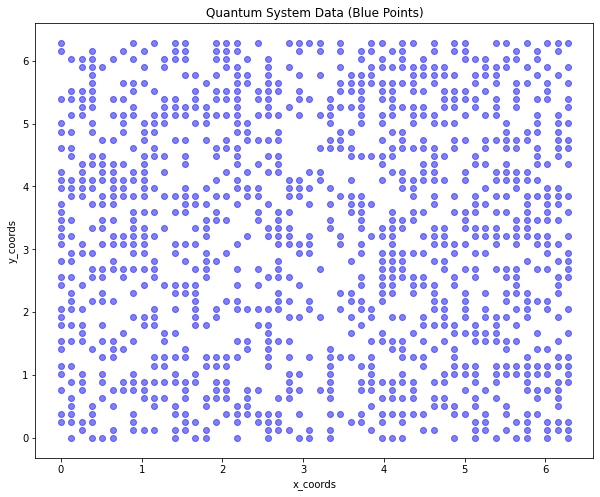

In [11]:
import json
import matplotlib.pyplot as plt


# Load the data from the JSON file
with open('data.json', 'r') as f:
    data = json.load(f)

# Extract the data including colors
theta_values = data['theta_values']
phi_values = data['phi_values']
results = data['results']

# Filter data points that are colored blue
blue_x_coords = [x for i, x in enumerate(theta_values) if colors[i] == 'blue']
blue_y_coords = [y for i, y in enumerate(phi_values) if colors[i] == 'blue']

# Create a scatter plot for the blue data points
plt.figure(figsize=(10, 8))
plt.scatter(blue_x_coords, blue_y_coords, c='blue', alpha=0.5)
plt.xlabel('x_coords')
plt.ylabel('y_coords')
plt.title('Quantum System Data (Blue Points)')
plt.show()


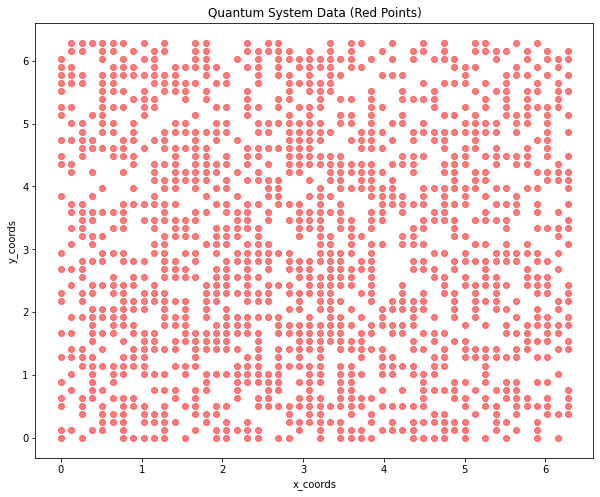

In [12]:
import json
import matplotlib.pyplot as plt

# Load the data from the JSON file
with open('data.json', 'r') as f:
    data = json.load(f)

# Extract the data including colors
theta_values = data['theta_values']
phi_values = data['phi_values']
results = data['results']

# Filter data points that are colored red
red_x_coords = [x for i, x in enumerate(theta_values) if colors[i] == 'red']
red_y_coords = [y for i, y in enumerate(phi_values) if colors[i] == 'red']

# Create a scatter plot for the red data points
plt.figure(figsize=(10, 8))
plt.scatter(red_x_coords, red_y_coords, c='red', alpha=0.5)
plt.xlabel('x_coords')
plt.ylabel('y_coords')
plt.title('Quantum System Data (Red Points)')
plt.show()


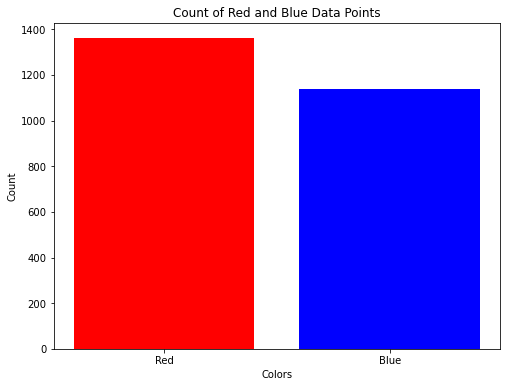

Red Count: 1361
Blue Count: 1139


In [13]:
red_count = colors.count('red')
blue_count = colors.count('blue')

# Create a bar plot to visualize the counts
plt.figure(figsize=(8, 6))
plt.bar(['Red', 'Blue'], [red_count, blue_count], color=['red', 'blue'])
plt.xlabel('Colors')
plt.ylabel('Count')
plt.title('Count of Red and Blue Data Points')
plt.show()

# Print the counts
print(f'Red Count: {red_count}')
print(f'Blue Count: {blue_count}')

In [15]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report


# Load the data from the JSON file
with open('data.json', 'r') as f:
    data = json.load(f)

# Extract features and target
X = np.column_stack((data['theta_values'], data['phi_values']))
y = data['colors']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Support Vector Machine': SVC()
}

for name, model in classifiers.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    
    print(f'{name} - Accuracy: {accuracy:.3f}')
    print(f'{name} - F1-score for Blue: {report["blue"]["f1-score"]:.3f}')
    print(f'{name} - F1-score for Red: {report["red"]["f1-score"]:.3f}')
    print()


Logistic Regression - Accuracy: 0.554
Logistic Regression - F1-score for Blue: 0.067
Logistic Regression - F1-score for Red: 0.707

Decision Tree - Accuracy: 0.494
Decision Tree - F1-score for Blue: 0.465
Decision Tree - F1-score for Red: 0.520

Random Forest - Accuracy: 0.506
Random Forest - F1-score for Blue: 0.447
Random Forest - F1-score for Red: 0.553

Gradient Boosting - Accuracy: 0.504
Gradient Boosting - F1-score for Blue: 0.303
Gradient Boosting - F1-score for Red: 0.615

Support Vector Machine - Accuracy: 0.564
Support Vector Machine - F1-score for Blue: 0.128
Support Vector Machine - F1-score for Red: 0.709



In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier()

# Train the Random Forest classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the Random Forest classifier
accuracy_rf = accuracy_score(y_test, y_pred_rf)
classification_report_rf = classification_report(y_test, y_pred_rf)

print(f'Random Forest - Accuracy: {accuracy_rf:.3f}')
print(f'Random Forest - Classification Report:\n{classification_report_rf}')


Random Forest - Accuracy: 0.484
Random Forest - Classification Report:
              precision    recall  f1-score   support

        blue       0.42      0.43      0.43       221
         red       0.54      0.52      0.53       279

    accuracy                           0.48       500
   macro avg       0.48      0.48      0.48       500
weighted avg       0.49      0.48      0.48       500



In [24]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create an MLP classifier
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)

# Train the MLP classifier
mlp_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_mlp = mlp_classifier.predict(X_test)

# Evaluate the MLP classifier
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
classification_report_mlp = classification_report(y_test, y_pred_mlp)

print(f'MLP Classifier - Accuracy: {accuracy_mlp:.3f}')
print(f'MLP Classifier - Classification Report:\n{classification_report_mlp}')


MLP Classifier - Accuracy: 0.554
MLP Classifier - Classification Report:
              precision    recall  f1-score   support

        blue       0.49      0.20      0.29       221
         red       0.57      0.83      0.68       279

    accuracy                           0.55       500
   macro avg       0.53      0.52      0.48       500
weighted avg       0.53      0.55      0.50       500



In [23]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)


# Define an even deeper neural network with more hidden layers
model = keras.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(2,)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(2, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=0)

# Make predictions on the testing data
y_pred_even_deeper_dnn = (model.predict(X_test) > 0.5).astype(int).flatten()

# Evaluate the even deeper neural network
accuracy_even_deeper_dnn = accuracy_score(y_test, y_pred_even_deeper_dnn)
classification_report_even_deeper_dnn = classification_report(y_test, y_pred_even_deeper_dnn)

print(f'Even Deeper Neural Network - Accuracy: {accuracy_even_deeper_dnn:.3f}')
print(f'Even Deeper Neural Network - Classification Report:\n{classification_report_even_deeper_dnn}')


2023-10-26 17:57:11.665273: W tensorflow/core/framework/op_kernel.cc:1807] OP_REQUIRES failed at cast_op.cc:121 : UNIMPLEMENTED: Cast string to float is not supported


UnimplementedError: Graph execution error:

Detected at node 'binary_crossentropy/Cast' defined at (most recent call last):
    File "/Users/hoangnguyen/opt/anaconda3/lib/python3.9/runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/Users/hoangnguyen/opt/anaconda3/lib/python3.9/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/Users/hoangnguyen/opt/anaconda3/lib/python3.9/site-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/Users/hoangnguyen/opt/anaconda3/lib/python3.9/site-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/Users/hoangnguyen/opt/anaconda3/lib/python3.9/site-packages/ipykernel/kernelapp.py", line 677, in start
      self.io_loop.start()
    File "/Users/hoangnguyen/opt/anaconda3/lib/python3.9/site-packages/tornado/platform/asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "/Users/hoangnguyen/opt/anaconda3/lib/python3.9/asyncio/base_events.py", line 601, in run_forever
      self._run_once()
    File "/Users/hoangnguyen/opt/anaconda3/lib/python3.9/asyncio/base_events.py", line 1905, in _run_once
      handle._run()
    File "/Users/hoangnguyen/opt/anaconda3/lib/python3.9/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/Users/hoangnguyen/opt/anaconda3/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 471, in dispatch_queue
      await self.process_one()
    File "/Users/hoangnguyen/opt/anaconda3/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 460, in process_one
      await dispatch(*args)
    File "/Users/hoangnguyen/opt/anaconda3/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 367, in dispatch_shell
      await result
    File "/Users/hoangnguyen/opt/anaconda3/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 662, in execute_request
      reply_content = await reply_content
    File "/Users/hoangnguyen/opt/anaconda3/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 360, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "/Users/hoangnguyen/opt/anaconda3/lib/python3.9/site-packages/ipykernel/zmqshell.py", line 532, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/Users/hoangnguyen/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2863, in run_cell
      result = self._run_cell(
    File "/Users/hoangnguyen/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2909, in _run_cell
      return runner(coro)
    File "/Users/hoangnguyen/opt/anaconda3/lib/python3.9/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/Users/hoangnguyen/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3106, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/Users/hoangnguyen/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3309, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/Users/hoangnguyen/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3369, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/var/folders/d1/bzn2sb0n0cqdk4hd51fyhb6r0000gn/T/ipykernel_13309/1320141941.py", line 30, in <cell line: 30>
      history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=0)
    File "/Users/hoangnguyen/opt/anaconda3/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/Users/hoangnguyen/opt/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1685, in fit
      tmp_logs = self.train_function(iterator)
    File "/Users/hoangnguyen/opt/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1284, in train_function
      return step_function(self, iterator)
    File "/Users/hoangnguyen/opt/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1268, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/hoangnguyen/opt/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1249, in run_step
      outputs = model.train_step(data)
    File "/Users/hoangnguyen/opt/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1051, in train_step
      loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/Users/hoangnguyen/opt/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1109, in compute_loss
      return self.compiled_loss(
    File "/Users/hoangnguyen/opt/anaconda3/lib/python3.9/site-packages/keras/engine/compile_utils.py", line 265, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/Users/hoangnguyen/opt/anaconda3/lib/python3.9/site-packages/keras/losses.py", line 142, in __call__
      losses = call_fn(y_true, y_pred)
    File "/Users/hoangnguyen/opt/anaconda3/lib/python3.9/site-packages/keras/losses.py", line 268, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/Users/hoangnguyen/opt/anaconda3/lib/python3.9/site-packages/keras/losses.py", line 2145, in binary_crossentropy
      y_true = tf.cast(y_true, y_pred.dtype)
Node: 'binary_crossentropy/Cast'
Cast string to float is not supported
	 [[{{node binary_crossentropy/Cast}}]] [Op:__inference_train_function_6201]